In [1]:
'''
__author__ = 'Alex Cheng'
sklearn惩罚线性回归模型
k-fold cross validation

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import roc_curve,auc
from math import sqrt

In [2]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
"wine-quality/winequality-red.csv")
df = pd.read_csv(target_url,header=0,sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
xList  = np.array(df.iloc[:,:-1]) # 属性数组
labels = [i for i in df.iloc[:,-1]] # 最后一列就是label
names = df.columns

# 正则化columns in x and labels
nrows = len(xList)
ncols = len(xList[0])

# 计算means and variance
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = sum((col - mean) **2)
    
    colDiff2 = [(xList[j,i] - mean) for j in range(nrows) ]
    sumSq = sum([colDiff2[i]  * colDiff2[i] for i in range(nrows)])
    stdDev2 = sqrt(sumSq/nrows)
    
    stdDev = sqrt(colDiff/nrows)
    xSD.append(stdDev)
#print(xMeans,'\n',xSD)
#print(stdDev == stdDev2) # broadcast广播变量的方式，发现结果一样


# 正则化xList
xNorm = []
for i in range(nrows):
    #rowNorm = ([xList[i] - xMeans]) / xSD  #列表不支持
    rowNorm = [(xList[i,j] - xMeans[j]) / xSD[j] for j in range(ncols)]
    xNorm.append(rowNorm)

# 正则化 labels
meanLable = sum(labels)/ nrows
sdLabel = sqrt(sum([ (labels[i] - meanLable) * (labels[i] - meanLable) for i in range(nrows)]) / nrows)
labelNorm = [ (labels[i] - meanLable) / sdLabel for i in range(nrows) ]

In [8]:
# 将输入从list转换为np array 为了应用sklearn packages
# 正则化的x,y
Xn = np.array(xNorm)
Yn = np.array(labelNorm)
# 未正则化的x,y
X = np.array(df.iloc[:,:-1]) # xList本来已经就是numpy array
Y = np.array(labels)


In [11]:
Xn.shape,X.shape,Yn.shape,Y.shape

((1599, 11), (1599, 11), (1599,), (1599,))

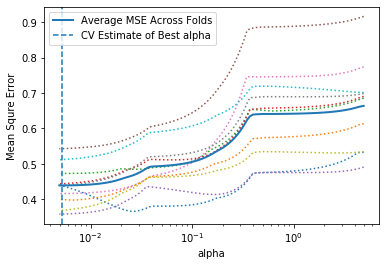

alpha value that Minimize CV error 0.0052692947038249175
minimun MSE 0.4393606730929137


In [23]:
# LassoCV
#alpha控制估计参数的稀疏度,自动搜索，越大惩罚项越大
wineModel = linear_model.LassoCV(cv=10).fit(X,Y) # 

plt.figure()
plt.plot(wineModel.alphas_,wineModel.mse_path_,':')
plt.plot(wineModel.alphas_,wineModel.mse_path_.mean(axis=-1),
        label='Average MSE Across Folds',linewidth=2)
plt.axvline(wineModel.alpha_,linestyle='--',label='CV Estimate of Best alpha')
plt.semilogx()
plt.legend()
ax = plt.gca()
plt.xlabel('alpha')
plt.ylabel('Mean Squre Error')
plt.axis('tight')
plt.show()

print("alpha value that Minimize CV error", wineModel.alpha_)
print("minimun MSE",min(wineModel.mse_path_.mean(axis=-1)))


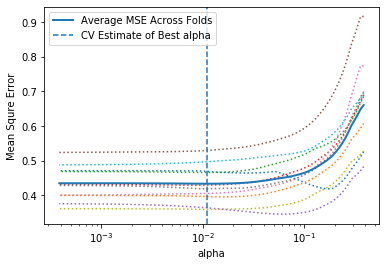

alpha value that Minimize CV error 0.010948337166040082
minimun MSE 0.4338019871536978


In [24]:
# LassoCV
#alpha控制估计参数的稀疏度,自动搜索，越大惩罚项越大
wineModel = linear_model.LassoCV(cv=10).fit(Xn,Yn) # 

plt.figure()
plt.plot(wineModel.alphas_,wineModel.mse_path_,':')
plt.plot(wineModel.alphas_,wineModel.mse_path_.mean(axis=-1),
        label='Average MSE Across Folds',linewidth=2)
plt.axvline(wineModel.alpha_,linestyle='--',label='CV Estimate of Best alpha')
plt.semilogx()
plt.legend()
ax = plt.gca()
plt.xlabel('alpha')
plt.ylabel('Mean Squre Error')
plt.axis('tight')
plt.show()

print("alpha value that Minimize CV error", wineModel.alpha_)
print("minimun MSE",min(wineModel.mse_path_.mean(axis=-1)))


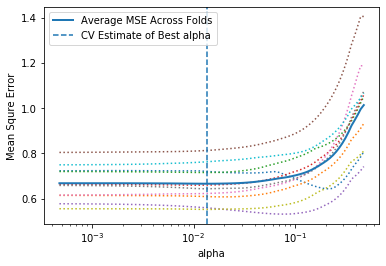

alpha value that Minimize CV error 0.013561387700964642
minimun MSE 0.6655849206002855


In [34]:
# LassoCV
#alpha控制估计参数的稀疏度,自动搜索，越大惩罚项越大
wineModel = linear_model.LassoCV(cv=10).fit(Xn,Y) # 

plt.figure()
plt.plot(wineModel.alphas_[::-1],wineModel.mse_path_[::-1],':')
plt.plot(wineModel.alphas_[::-1],wineModel.mse_path_[::-1].mean(axis=-1),
        label='Average MSE Across Folds',linewidth=2)
plt.axvline(wineModel.alpha_,linestyle='--',label='CV Estimate of Best alpha')
plt.semilogx()
plt.legend()
ax = plt.gca()
plt.xlabel('alpha')
plt.ylabel('Mean Squre Error')
plt.axis('tight')
plt.show()

print("alpha value that Minimize CV error", wineModel.alpha_)
print("minimun MSE",min(wineModel.mse_path_.mean(axis=-1)))


In [26]:
# Y对归一化并不会对结果有本质差异，对标签挥一挥会使MSE失去与原始数据的关联
# X做归一化

In [54]:
#wineModel.alphas_

In [55]:
#wineModel.alphas_[::-1]

Normalized X


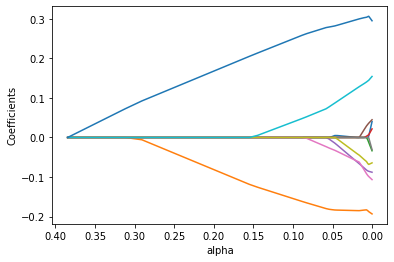

In [56]:
# 部署前在整个数据集上进行训练
# 交叉验证可以对模型性能进行评估，同时获得性能更好的alpha参数值
print("Normalized X")
alphas,coefs,_ = linear_model.lasso_path(Xn,Y,return_models=False)
plt.plot(alphas,coefs.T)
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.axis('tight')
plt.semilogx
ax = plt.gca()
ax.invert_xaxis()
plt.show()

In [57]:
nattr,nalpha = coefs.shape # 相关系数（11,100）
# 找到相关系数的次序
nzList = []
for iAlpha in range(1,nalpha):
    coefList = list(coefs[:,iAlpha])
    nzCoef = [index for index in range(nattr) if coefList[index] != 0.0] # 非零的系数
    for q in nzCoef:
        if q not in nzList:
            nzList.append(q)

nameList = [names[nzList[i]] for i in range(len(nzList))]
print("Attribute ordered by how early the enter the model:\n",nameList)
    

Attribute ordered by how early the enter the model:
 ['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'chlorides', 'fixed acidity', 'pH', 'free sulfur dioxide', 'residual sugar', 'citric acid', 'density']


In [58]:
# 找到最佳alpha值对应的相关系数，alpha = 0.013561387700964642
print("Best alpha value:",wineModel.alpha_)
alphaStar = 0.013561387700964642

indexLTalphaStar = [index for index in range(100) if alphas[index] > alphaStar]
indexStar = max(indexLTalphaStar) # alpha最大值的索引
print(indexLTalphaStar)
print(indexStar)

# 相关系数
coefStar = list(coefs[:,indexStar]) # 最大alpha对应的相关系数
print("Best Coefficient Values",coefStar )

absCoef = [abs(a) for a in coefStar] # 绝对值
coefSorted = sorted(absCoef, reverse=True) # 绝对值降序

idxCoefSize = [absCoef.index(a) for a in coefSorted if not(a==0.0)] # 系数对应的索引
namesList2 = [names[idxCoefSize[i]] for i in range(len(idxCoefSize))] # 系数对应的名称
print("Attributed ordered by coef Size at Optimum alpha: \n",namesList2)

Best alpha value: 0.013561387700964642
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
47
Best Coefficient Values [0.0, -0.18468000598801876, -0.0, 0.0, -0.07001123681740698, 0.006565392317074188, -0.06883987755400782, -0.0, -0.04845700178911536, 0.1311855089139663, 0.30108773571769964]
Attributed ordered by coef Size at Optimum alpha: 
 ['alcohol', 'volatile acidity', 'sulphates', 'chlorides', 'total sulfur dioxide', 'pH', 'free sulfur dioxide']
